# Dataset of the 2016 matric year results

This dataset will be looking into the 2016 matric year results, to find out how this year compares to the previous year. Also we would like to see the performance of certain areas in the dataset and how they could possibly correlate with one another

## Setting the Dataset

In this section of our project, we will be setting up the dataset by importing the necessary libraries and also reading the file 2016-matric_year.csv file into a pandas dataframe.

We will also be cleaning up the defined dataset into a readable and more functional table to which we perform actions like exploring the dataset and also visualizing the data.

### Importing and Reading .csv file

In [945]:
#Declaring our imports
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
from scipy import stats
from datetime import datetime
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [946]:
# Declaring our dataset
df = pd.read_csv('2016-matric_year.csv')
df

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,BETHEL COLLEGE HIGH SCHOOL,99.0,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,440303196,3171015,DR VILJOEN CS,5.0,97.0,88.0,90.7,9.0,72.0,57.0,79.2,0,95,82,86.3
996,445203253,3171105,EMET CHRISTIAN COLLEGE,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2,100.0
997,440304210,3171017,EUNICE SS,5.0,177.0,177.0,100.0,0.0,174.0,174.0,100.0,0,164,164,100.0
998,441207293,3173006,EXCELSIOR CS,3.0,23.0,19.0,82.6,6.0,9.0,8.0,88.9,7,15,10,66.7


In [947]:
# Columns that currently exist within dataset
df.columns


Index(['emis', 'centre_no', 'name', 'quintile', 'wrote_2014', 'passed_2014',
       'perc_2014', 'progressed_2015', 'wrote_2015', 'passed_2015',
       'perc_2015', 'progressed_2016', 'wrote_2016', 'passed_2016',
       'perc_2016'],
      dtype='object')

### Cleaning up the dataframe

In [948]:
# Discovering missing data
missing_values_count = df.isnull().sum()
missing_values_count[:15]

emis                0
centre_no           0
name                0
quintile            9
wrote_2014         44
passed_2014        44
perc_2014           2
progressed_2015    20
wrote_2015         20
passed_2015        20
perc_2015          20
progressed_2016     0
wrote_2016          0
passed_2016         0
perc_2016           0
dtype: int64

<AxesSubplot:>

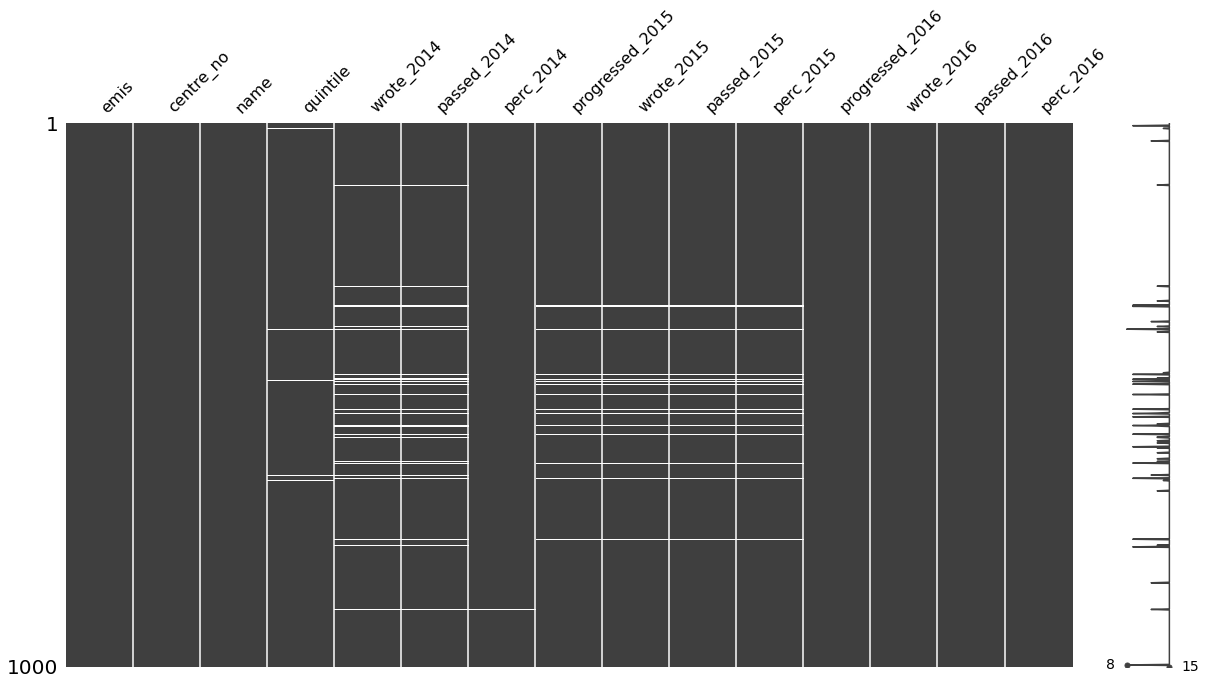

In [949]:
# # Chart to display how the data that is missing looks like
missingno.matrix(df, figsize=(20,10))

In [1007]:
# performing imputation on the data that is missing.
df = df.fillna(method='bfill',axis=0).fillna(0)
#df = df.fillna(df.median().loc[:,['quintile','wrote_2014','passed_2014','perc_2014','progressed_2015','wrote_2015','passed_2015','perc_2015']])
df.head()

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,BETHEL COLLEGE HIGH SCHOOL,99.0,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7


<AxesSubplot:>

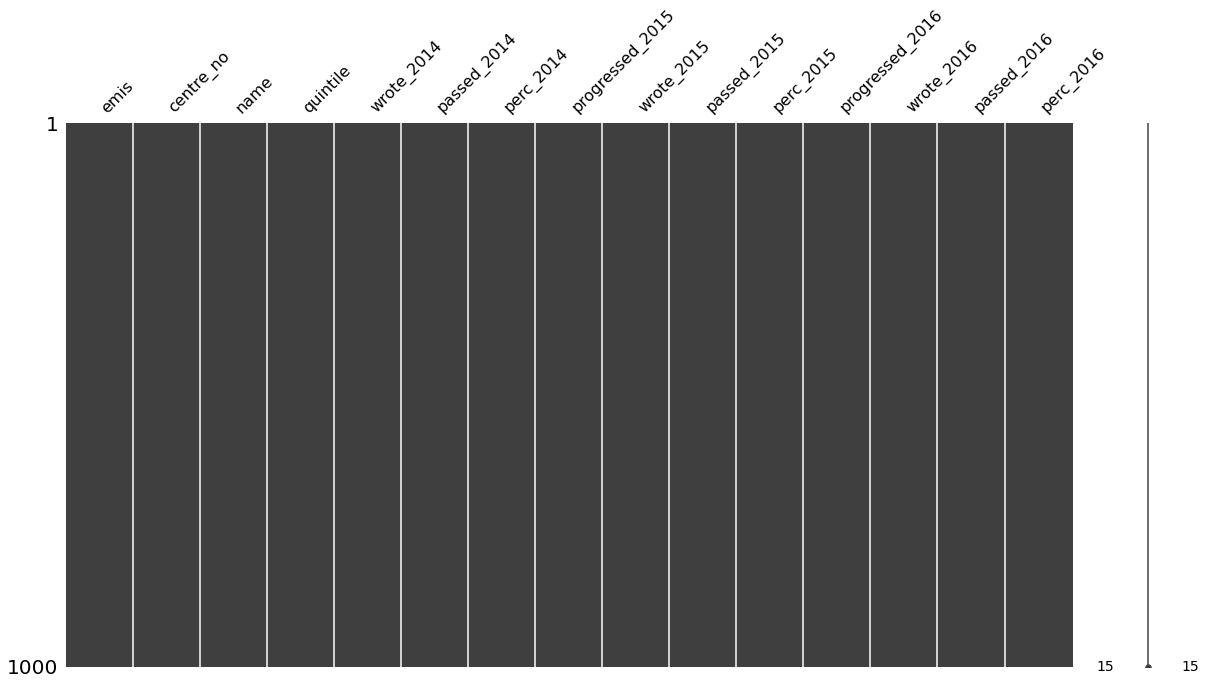

In [1008]:
# Chart to display how the data looks like after imputation
missingno.matrix(df, figsize=(20,10))

## Exploring the data

In this section, I will be exploring the values that are contained within the dataset. Doing same basic comparisons, finding out the minimum and the maximum for selected column values and selecting the columns that will be later used for Data Visualization

#### How many schools belong to each quintile?

In [1009]:

quintile_df = df.loc[:,['quintile']]
quintile_df.value_counts()

quintile
3.0         393
1.0         223
2.0         198
5.0          86
99.0         57
4.0          43
dtype: int64

#### Comparing School with Quintiles of a 100% pass rate for each year

In [1010]:

quintile_pass_2014_df = df.loc[:,['quintile', 'perc_2014']]
quintile_pass_2014_df = quintile_pass_2014_df.loc[quintile_pass_2014_df['perc_2014'] == 100]
quintile_pass_2014_df.value_counts()

quintile  perc_2014
5.0       100.0        25
99.0      100.0        10
4.0       100.0         7
1.0       100.0         5
3.0       100.0         4
2.0       100.0         1
dtype: int64

In [1033]:
quintile_pass_2015_df = df.loc[:,['quintile', 'perc_2015']]
quintile_pass_2015_df = quintile_pass_2015_df.loc[quintile_pass_2015_df['perc_2015'] == 100]
quintile_pass_2015_df.value_counts()

quintile  perc_2015
5.0       100.0        25
4.0       100.0        10
99.0      100.0         8
3.0       100.0         5
1.0       100.0         3
2.0       100.0         2
dtype: int64

In [1034]:
quintile_pass_2016_df = df.loc[:,['quintile', 'perc_2016']]
quintile_pass_2016_df = quintile_pass_2016_df.loc[quintile_pass_2016_df['perc_2016'] == 100]
quintile_pass_2016_df.value_counts()

quintile  perc_2016
5.0       100.0        32
3.0       100.0        12
99.0      100.0        11
4.0       100.0        10
2.0       100.0         5
1.0       100.0         1
dtype: int64

#### Exploring the top 5 Schools who wrote the most for each year

In [1035]:

name_wrote2014 = df.loc[:,['name', 'wrote_2014', 'passed_2014']]
name_wrote2014['failed_2014'] = name_wrote2014['wrote_2014'] -name_wrote2014['passed_2014']
name_2014 = name_wrote2014.sort_values(by=['wrote_2014'], ascending=False).head(10)

In [1036]:
name_wrote2015 = df.loc[:,['name', 'wrote_2015','passed_2015']]
name_wrote2015['failed_2015'] = name_wrote2015['wrote_2015'] -name_wrote2015['passed_2015']
name_wrote2015.sort_values(by=['wrote_2015'], ascending=False).head()

,name,wrote_2015,passed_2015,failed_2015
119,NGANGOLWANDLE SENIOR SENIOR SECONDARY,648.0,415.0,233.0
103,EXECUTIVE ACADEMY,470.0,301.0,169.0
613,ST JOHNS COLLEGE,462.0,428.0,34.0
464,BIZANA SENIOR SECONDARY SCHOOL,448.0,279.0,169.0
425,TOLI SENIOR SECONDARY SCHOOL,425.0,391.0,34.0


In [1037]:
name_wrote2016 = df.loc[:,['name', 'wrote_2016','passed_2016']]
name_wrote2016['failed_2016'] = name_wrote2016['wrote_2016'] -name_wrote2016['passed_2016']
name_wrote2016.sort_values(by=['wrote_2016'], ascending=False).head()

,name,wrote_2016,passed_2016,failed_2016
119,NGANGOLWANDLE SENIOR SENIOR SECONDARY,707,200,507
464,BIZANA SENIOR SECONDARY SCHOOL,420,279,141
504,LEHANA SENIOR SECONDARY SCHOOL,418,282,136
448,MQIKELA SENIOR SENIOR SECONDARY SCHOOL,402,119,283
613,ST JOHNS COLLEGE,394,378,16


#### Exploring the top 5 Schools who passed the most for each year

In [1038]:

name_passed2014 = df.loc[:,['name', 'passed_2014']]
name_passed2014.sort_values(by=['passed_2014'], ascending=False).head()

,name,passed_2014
613,ST JOHNS COLLEGE,343.0
425,TOLI SENIOR SECONDARY SCHOOL,286.0
986,BREBNER SS,283.0
588,KHANYA PRIVATE SCHOOL,272.0
589,KHANYISA HIGH SCHOOL,272.0


In [1039]:
name_passed2015 = df.loc[:,['name', 'passed_2015']]
name_passed2015.sort_values(by=['passed_2015'], ascending=False).head()

,name,passed_2015
613,ST JOHNS COLLEGE,428.0
119,NGANGOLWANDLE SENIOR SENIOR SECONDARY,415.0
425,TOLI SENIOR SECONDARY SCHOOL,391.0
103,EXECUTIVE ACADEMY,301.0
464,BIZANA SENIOR SECONDARY SCHOOL,279.0


In [1040]:
name_passed2016 = df.loc[:,['name', 'passed_2016']]
name_passed2016.sort_values(by=['passed_2016'], ascending=False).head()

,name,passed_2016
613,ST JOHNS COLLEGE,378
425,TOLI SENIOR SECONDARY SCHOOL,316
410,NDAMASE SENIOR SECONDARY SCHOOL,298
504,LEHANA SENIOR SECONDARY SCHOOL,282
464,BIZANA SENIOR SECONDARY SCHOOL,279


#### Exploring the top 5 schools with the highest percentage

In [1041]:

name_perc2014 = df.loc[:,['name', 'perc_2014']]
name_perc2014.sort_values(by=['perc_2014'], ascending=False).head()

,name,perc_2014
999,FICHARDTPARK SS,100.0
92,TARKASTAD HIGH SCHOOL,100.0
813,VUKUZENZELE SPECIAL SCHOOL,100.0
810,STERKSPRUIT CHRISTIAN SCHOOL,100.0
931,ITOKISETSENG CFS,100.0


In [1042]:
name_perc2015 = df.loc[:,['name', 'perc_2015']]
name_perc2015.sort_values(by=['perc_2015'], ascending=False).head()

,name,perc_2015
999,FICHARDTPARK SS,100.0
135,BEACONHURST SCHOOL,100.0
788,BURGERSDORP HIGH SCHOOL,100.0
817,GLOBAL LEADERSHIP ACADEMY,100.0
153,GRENS HIGH SCHOOL,100.0


In [1043]:
name_perc2016 = df.loc[:,['name', 'perc_2016']]
name_perc2016.sort_values(by=['perc_2016'], ascending=False).head()

,name,perc_2016
999,FICHARDTPARK SS,100.0
713,PEARSON HIGH SCHOOL,100.0
92,TARKASTAD HIGH SCHOOL,100.0
820,HOeRSKOOL MC LACHLAN,100.0
87,MIDDELBURG HIGH SCHOOL,100.0


#### How many schools had a 100% pass rate from each year

In [1044]:

quintile_df = df['perc_2014']
pass_rate_100_percent_2014 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2014

100.0    52
Name: perc_2014, dtype: int64

In [1045]:
quintile_df = df['perc_2015']
pass_rate_100_percent_2015 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2015

100.0    53
Name: perc_2015, dtype: int64

In [1046]:
quintile_df = df['perc_2016']
pass_rate_100_percent_2016 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2016

100.0    71
Name: perc_2016, dtype: int64

# Visualization of the data

This section will visualize the data which I will explore.  

From here, we will just draw up visuals just to provide and even better represantion of the data.

We will use different type of charts to in order to present the different types of data.

#### Horizontal bar graph of how many schools belong to each quintile? 

Text(0.5, 1.0, 'How many schools  belong to each quintile')

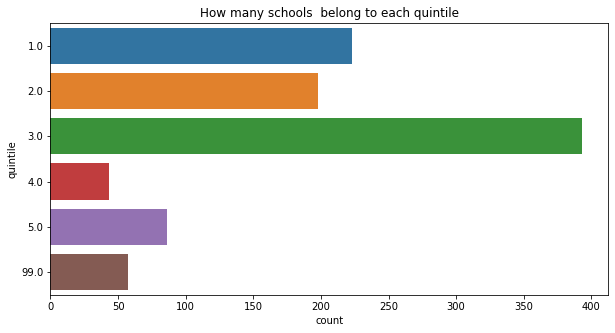

In [1047]:

fig =plt.figure(figsize=(10,5))
sns.countplot(y='quintile', data=df)
plt.title("How many schools  belong to each quintile?")

#### Vertical bar graph of the performance of schools for each year.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(2, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(3, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'BETHEL COLLEGE HIGH SCHOOL'),
  Text(5, 0, 'BUTTERWORTH REVIVAL CHRISTIAN SCHOOL'),
  Text(6, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(7, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(8, 0, 'ELUKHANYISWENI COLLEGE'),
  Text(9, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL')])

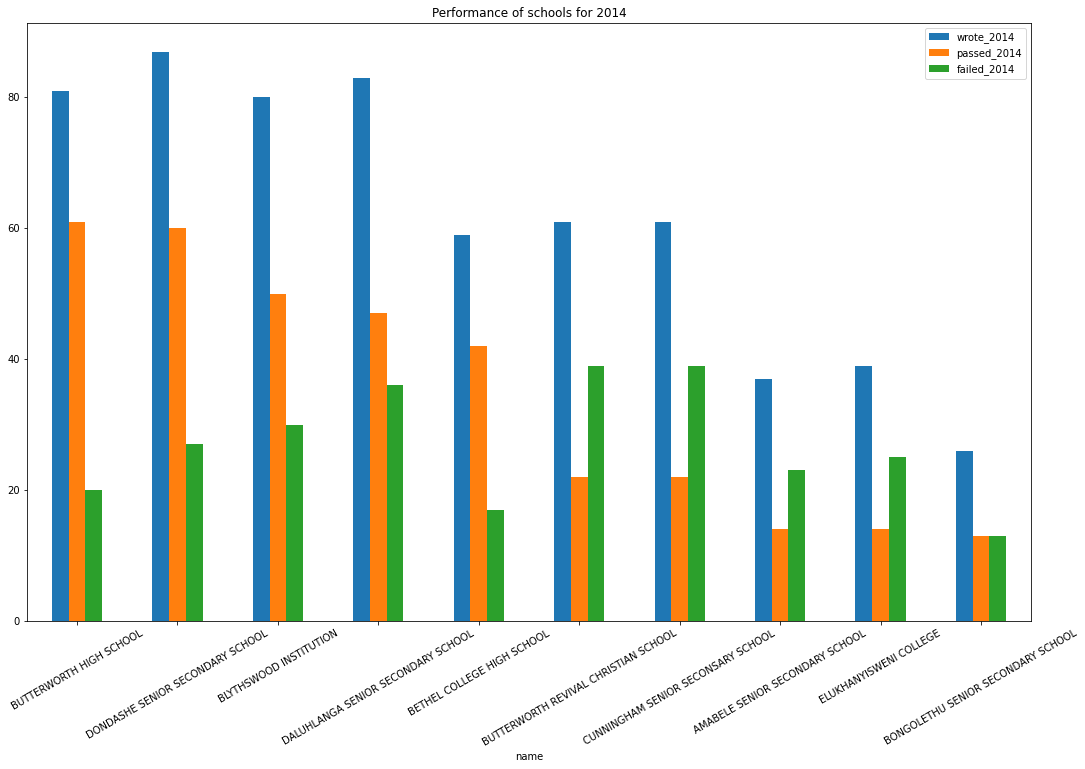

In [1071]:

name_wrote2014.iloc[:10,].sort_values(by='passed_2014', ascending=False).plot(kind='bar',x='name',figsize=(18,10),title='Performance of schools for 2014')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(2, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(3, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'BETHEL COLLEGE HIGH SCHOOL'),
  Text(5, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(6, 0, 'BUTTERWORTH REVIVAL CHRISTIAN SCHOOL'),
  Text(7, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(8, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL'),
  Text(9, 0, 'ELUKHANYISWENI COLLEGE')])

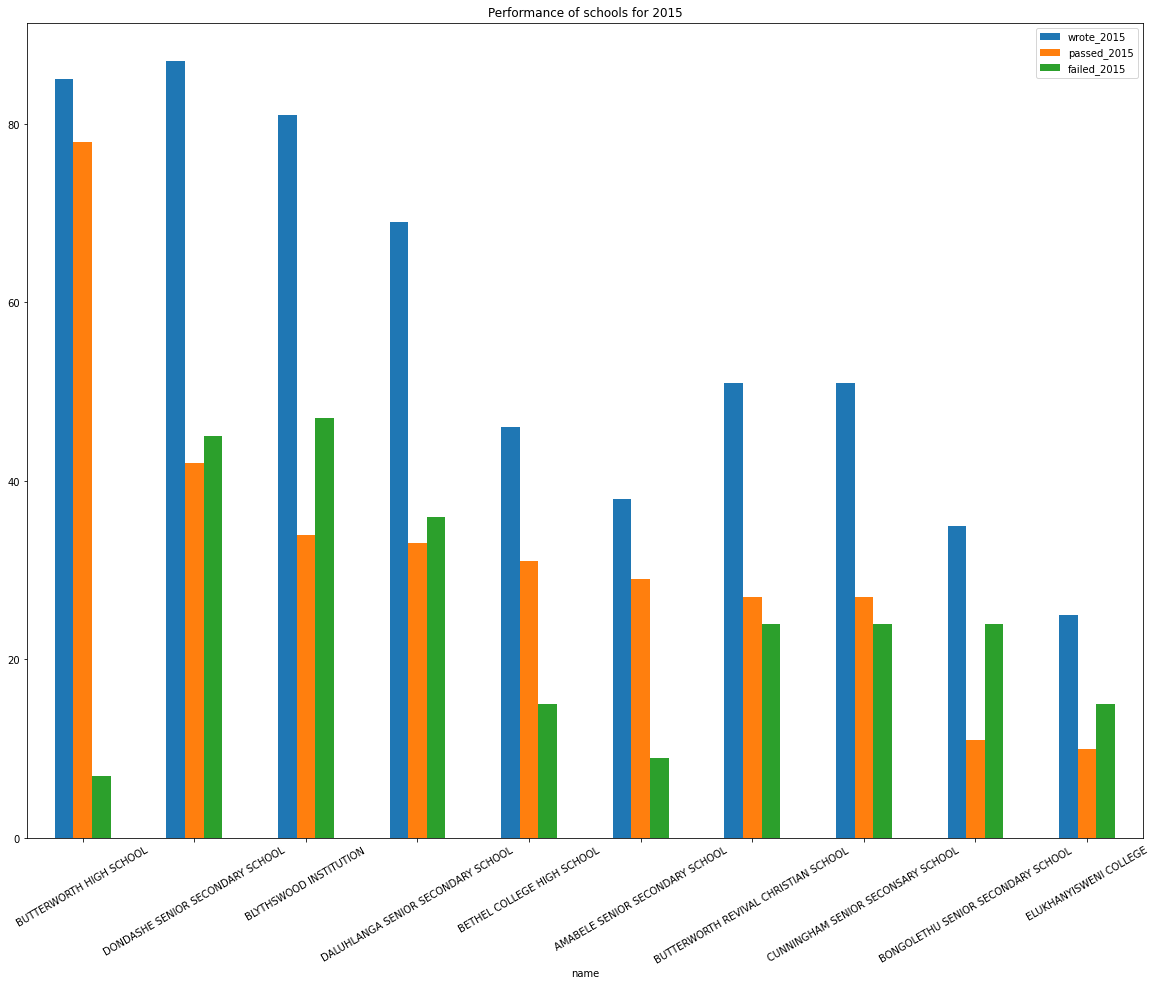

In [1072]:
name_wrote2015.iloc[:10,].sort_values(by='passed_2015', ascending=False).plot(kind='bar',x='name',figsize=(20,15),title='Performance of schools for 2015')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(2, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(3, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(5, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(6, 0, 'BETHEL COLLEGE HIGH SCHOOL'),
  Text(7, 0, 'BUTTERWORTH REVIVAL CHRISTIAN SCHOOL'),
  Text(8, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL'),
  Text(9, 0, 'ELUKHANYISWENI COLLEGE')])

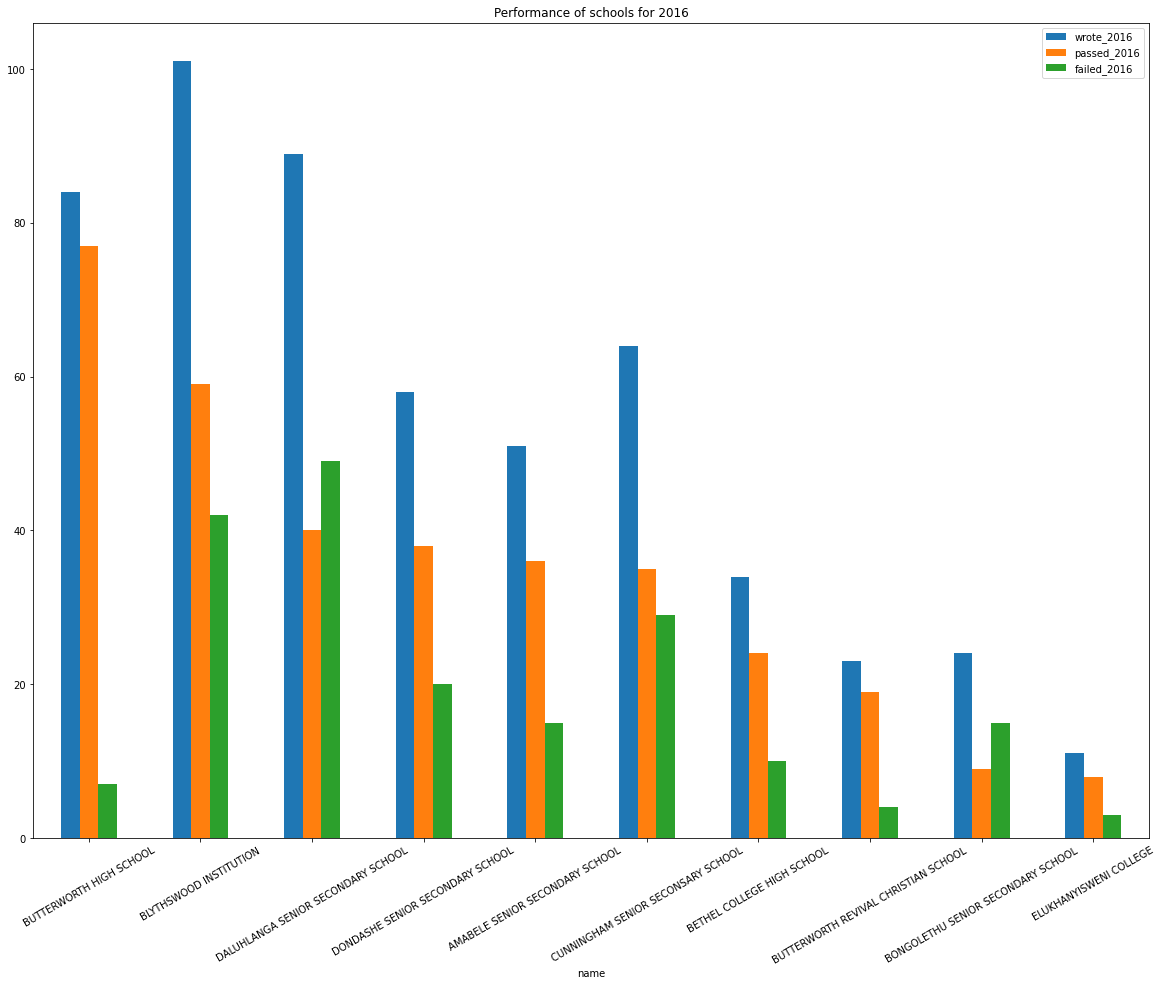

In [1073]:
name_wrote2016.iloc[:10,].sort_values(by='passed_2016', ascending=False).plot(kind='bar',x='name',figsize=(20,15),title='Performance of schools for 2016')
plt.xticks(rotation=30)

#### Horizontal stacked bar graph of the top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years.

<AxesSubplot:title={'center':'Top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years'}, ylabel='name'>

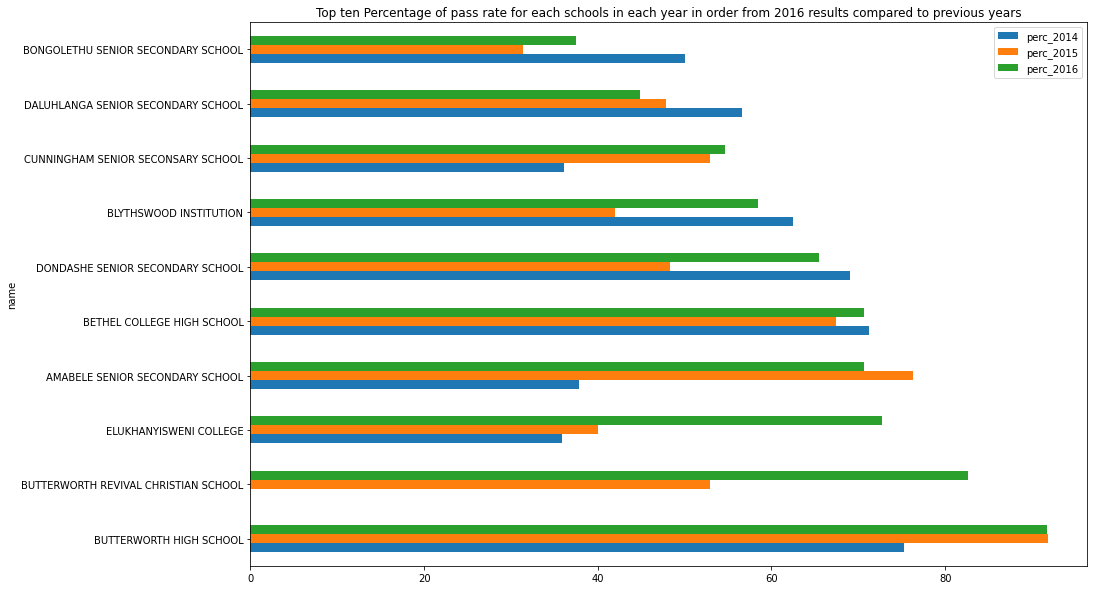

In [1074]:

perc_rates_of_schools = df.loc[:,['name', 'perc_2014', 'perc_2015','perc_2016']]
perc_rates_of_schools.iloc[:10].sort_values(by='perc_2016', ascending=False).plot.barh(x='name',figsize=(15,10), title='Top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years')


#### Pie chart of the most performing quintile for each year.

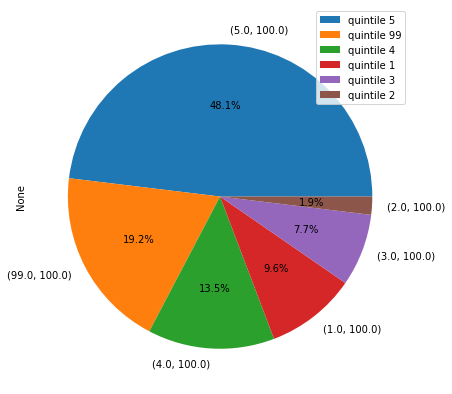

In [1075]:

fig,ax = plt.subplots()
pass_rate_of_100_percent_2014 = quintile_pass_2014_df.value_counts()
x_axis = ['quintile 5','quintile 99','quintile 4','quintile 1','quintile 3','quintile 2']
pass_rate_of_100_percent_2014.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)


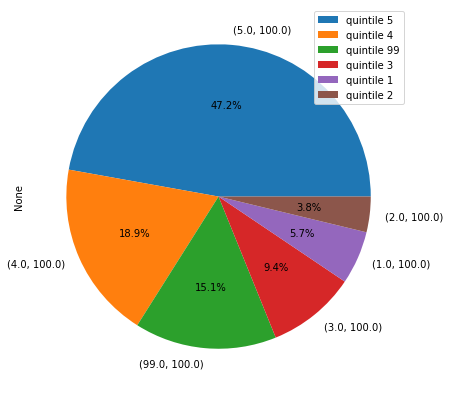

In [1076]:
fig,ax = plt.subplots()
pass_rate_of_100_percent_2015 = quintile_pass_2015_df.value_counts()
x_axis = ['quintile 5','quintile 4','quintile 99','quintile 3','quintile 1','quintile 2']
pass_rate_of_100_percent_2015.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)

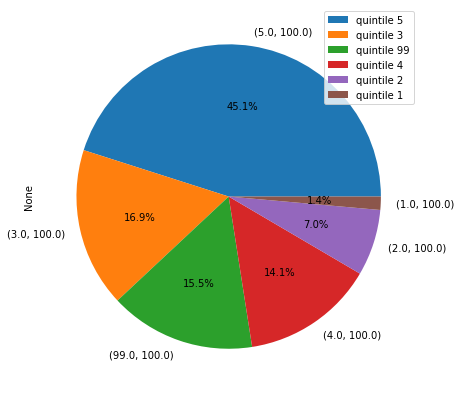

In [1077]:
fig,ax = plt.subplots()
pass_rate_of_100_percent_2016 = quintile_pass_2016_df.value_counts()
x_axis = ['quintile 5','quintile 3','quintile 99','quintile 4','quintile 2','quintile 1']
pass_rate_of_100_percent_2016.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)